In [1]:
import torch
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

from m2_utilities.load_data import load_trajectories
from m2_utilities.preprocessor import tokenize, detokenize

%load_ext autoreload
%autoreload 2

### Loading Predator-Prey Data

In [3]:
unscaled_trajectories = load_trajectories("data/lotka_volterra_data.h5")

### Scaling So All Values < 10

In [4]:
ALPHA = 1.5
trajectories = unscaled_trajectories / ALPHA

### Making Some Visualisations

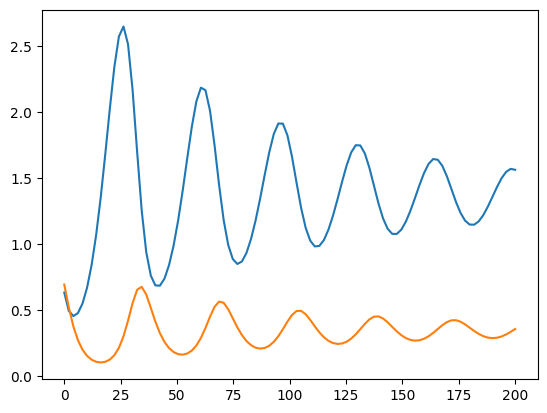

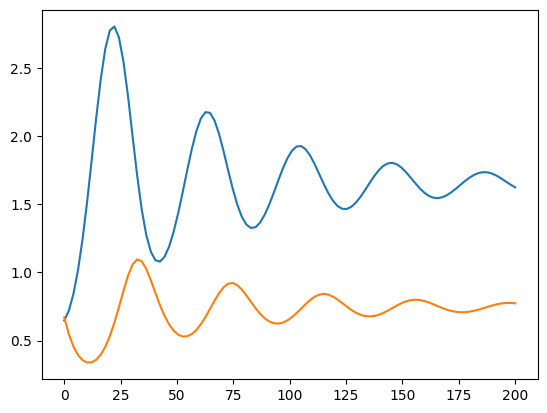

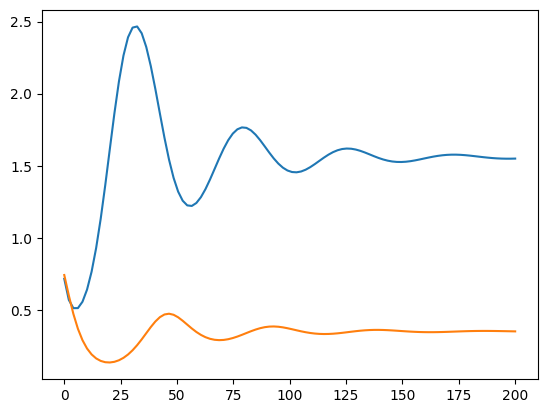

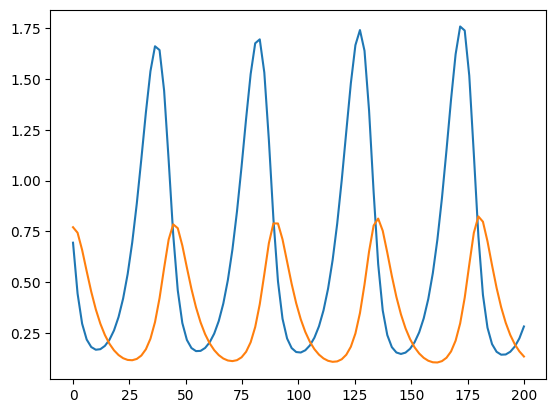

In [5]:
system_ids = [0, 1, 2, 3]

time_points = torch.linspace(0, 200, 100)
for system_id in system_ids:
    predators = trajectories[system_id, :, 0]
    prey = trajectories[system_id, :, 1]

    plt.plot(time_points, predators)
    plt.plot(time_points, prey)
    plt.show()

### Some Metrics

In [6]:
print(f"Max Predators: {torch.max(unscaled_trajectories[:, :, 0])}")
print(f"Min Predators: {torch.min(unscaled_trajectories[:, :, 0])}")
print(f"Max Prey: {torch.max(unscaled_trajectories[:, :, 1])}")
print(f"Min Prey: {torch.min(unscaled_trajectories[:, :, 1])}")

Max Predators: 13.740113258361816
Min Predators: 0.002077328274026513
Max Prey: 4.768490314483643
Min Prey: 3.735509380931035e-05


In [7]:
print(f"Max Predators: {torch.max(trajectories[:, :, 0])}")
print(f"Min Predators: {torch.min(trajectories[:, :, 0])}")
print(f"Max Prey: {torch.max(trajectories[:, :, 1])}")
print(f"Min Prey: {torch.min(trajectories[:, :, 1])}")

Max Predators: 9.160075187683105
Min Predators: 0.0013848855160176754
Max Prey: 3.1789934635162354
Min Prey: 2.4903396479203366e-05


### Tokenizing the Trajectories

In [51]:
DECIMALS = 3
tokens = tokenize(trajectories, DECIMALS)
print(tokens.shape)

torch.Size([1000, 1199])


### Detokenizing the Trajectories

In [52]:
detokenized = detokenize(tokens)
print(detokenized.shape)

torch.Size([1000, 100, 2])


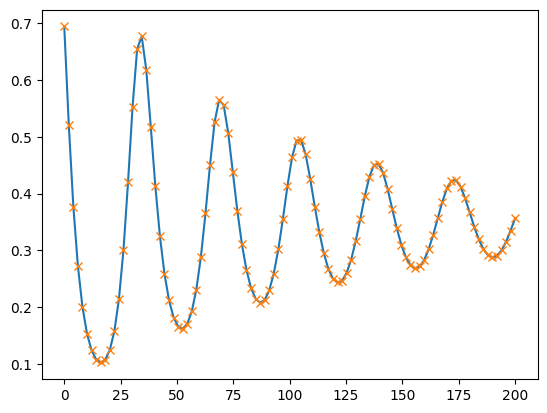

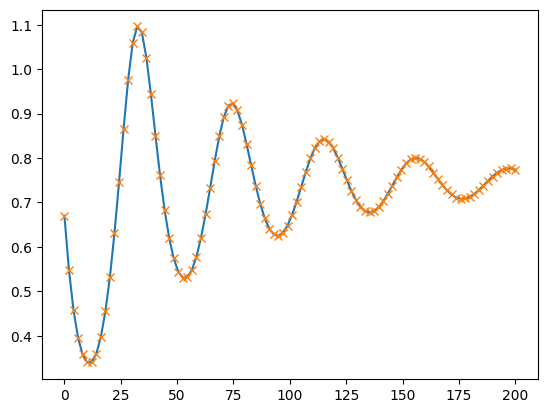

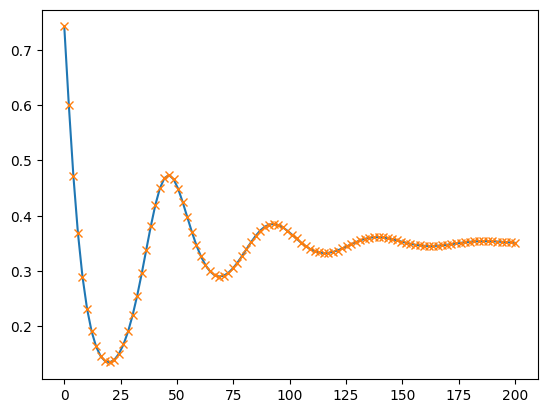

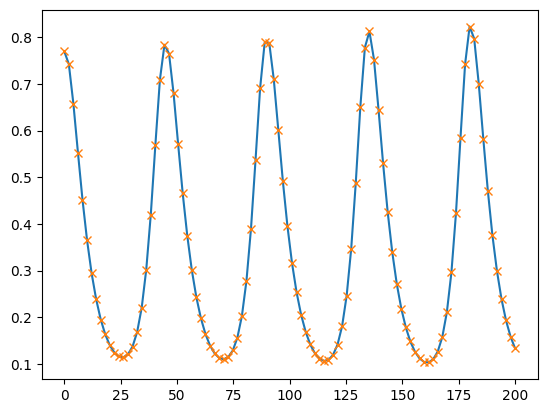

In [53]:
system_ids = [0, 1, 2, 3]

time_points = torch.linspace(0, 200, 100)
for system_id in system_ids:
    original = trajectories[system_id, :, 1]
    restored = detokenized[system_id, :, 1]

    plt.plot(time_points, original)
    plt.plot(time_points, restored, "x")
    plt.show()